In [1]:
import EITfunc.EITlook as eit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import os
import itertools

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii, fits
from astropy.table import Table
from astropy.timeseries import LombScargle
import astropy.time

import scipy.optimize as sciop
from scipy.stats import mode, binned_statistic

import time

%matplotlib inline

In [2]:
jan1_1996 = '1996-01-01T00:00:00.000Z'
jan1_1996 = astropy.time.Time(jan1_1996).jd
print(jan1_1996)

months = [r'Jan',r'Feb',r'Mar',r'Apr',r'May',r'June',r'July',r'Aug',r'Sept',r'Oct',r'Nov',r'Dec','']


2450083.5


In [3]:
#red  = "./VIRGO/VIRGO-SPM-RED-L2-MISSIONLONG.fits"
#green= "./VIRGO/VIRGO-SPM-GREEN-L2-MISSIONLONG.fits"
#blue = "./VIRGO/VIRGO-SPM-BLUE-L2-MISSIONLONG.fits"
#loi =  "./VIRGO/VIRGO-LOI-ALL-PIXELS-LEVEL2-19960401-20210430_V01.fits" #Luminosity Oscillations Imager low degree oscillations data

TSIdaily = Table.read("./VIRGO/VIRGO_TSI_daily.dat", format="ascii.basic")
TSIdaily['jd'] = 0.

for i in range(len(TSIdaily)):
    date = str(TSIdaily['date_YYYYMMDD'][i])
    y = int(date[0:4])
    m = int(date[4:6])
    d = int(date[6:8])
    TSIdaily[i]['jd'] = astropy.time.Time({'year':y, 'month':m, 'day':d, 'hour':12}).jd
    
print(TSIdaily)
print(type(TSIdaily[0]['jd']))
'''
TSIhourly = Table.read("./VIRGO/VIRGO_TSI_hourly.dat", format="ascii.basic")
TSIhourly['jd'] = 0.

for i in range(len(TSIhourly)):
    date = str(TSIhourly['date_YYYYMMDD'][i])
    time = str(TSIhourly['time_hhmmss'][i]).zfill(6)
    
    y = int(date[0:4])
    m = int(date[4:6])
    d = int(date[6:8])
    
    h = int(time[0:2])
    min = int(time[2:4])
    s = int(time[4:6])

    TSIhourly[i]['jd'] = np.round(astropy.time.Time({'year':y, 'month':m, 'day':d, 'hour':h, 'minute':min, 'second':s}).jd,3)

print(TSIhourly)
'''

date_YYYYMMDD VIRGO_new  VIRGO_orig DIARAD_orig PMO6V_orig     jd   
------------- ---------- ---------- ----------- ---------- ---------
     19960128 1360.71285 1365.65491       -99.0 1365.31482 2450111.0
     19960129 1360.70884 1365.65088       -99.0 1365.31116 2450112.0
     19960130 1360.72076 1365.66284       -99.0 1365.32349 2450113.0
     19960131 1360.73134 1365.67346       -99.0 1365.33411 2450114.0
     19960201 1360.74691 1365.68909       -99.0 1365.34998 2450115.0
     19960202 1360.74217 1365.68433       -99.0 1365.34521 2450116.0
     19960203 1360.69887 1365.64087       -99.0   1365.302 2450117.0
     19960204 1360.65508 1365.59692       -99.0 1365.25818 2450118.0
     19960205  1360.6355 1365.57727       -99.0 1365.23865 2450119.0
     19960206 1360.64511 1365.58691       -99.0 1365.24866 2450120.0
     19960207   1360.658 1365.59985  1365.95032 1365.25623 2450121.0
     19960208 1360.62783 1365.56958  1365.90845 1365.23157 2450122.0
     19960209 1360.63635 1365.5781

'\nTSIhourly = Table.read("./VIRGO/VIRGO_TSI_hourly.dat", format="ascii.basic")\nTSIhourly[\'jd\'] = 0.\n\nfor i in range(len(TSIhourly)):\n    date = str(TSIhourly[\'date_YYYYMMDD\'][i])\n    time = str(TSIhourly[\'time_hhmmss\'][i]).zfill(6)\n    \n    y = int(date[0:4])\n    m = int(date[4:6])\n    d = int(date[6:8])\n    \n    h = int(time[0:2])\n    min = int(time[2:4])\n    s = int(time[4:6])\n\n    TSIhourly[i][\'jd\'] = np.round(astropy.time.Time({\'year\':y, \'month\':m, \'day\':d, \'hour\':h, \'minute\':min, \'second\':s}).jd,3)\n\nprint(TSIhourly)\n'

In [4]:
pmodwrc_TSIdaily = Table.read("./VIRGO/pmodwrc_VIRGO_TSI_Daily_V8_20231211.txt", format="ascii.basic")
pmodwrc_TSIdaily['jd'] = 0.

for i in range(len(pmodwrc_TSIdaily)):
    tobs = pmodwrc_TSIdaily['utc_time'][i]
    pmodwrc_TSIdaily['jd'][i] = np.round(astropy.time.Time(tobs).jd,1)
    
print(pmodwrc_TSIdaily)

# make text file version with only relevant columns and conversion to JD
toSave = np.vstack((pmodwrc_TSIdaily['jd'].T, pmodwrc_TSIdaily['TSI_virgo_fused_new'].T, pmodwrc_TSIdaily['TSI_virgo_fused_unc'])).T
np.savetxt("./VIRGO/virgoDailyData.txt", toSave, fmt="%f", header="t_obs[JD] flux[W m^-2] flux_unc[W m^-2]")


        utc_time        tai_seconds PMO6V-A_orig TSI_virgo_fused_orig ... PMO6V_A_new TSI_virgo_fused_new     jd   
----------------------- ----------- ------------ -------------------- ... ----------- ------------------- ---------
1996-02-21T11:59:30.000  1203595200     1365.068             1365.121 ...    1360.427            1360.481 2450135.0
1996-02-22T11:59:30.000  1203681600     1365.091             1365.047 ...    1360.451            1360.406 2450136.0
1996-02-23T11:59:30.000  1203768000     1365.057             1365.053 ...    1360.416            1360.412 2450137.0
1996-02-24T11:59:30.000  1203854400     1365.088             1365.052 ...    1360.447            1360.411 2450138.0
1996-02-25T11:59:30.000  1203940800     1365.093             1365.085 ...    1360.452            1360.444 2450139.0
1996-02-26T11:59:30.000  1204027200     1365.131             1365.107 ...    1360.491            1360.466 2450140.0
1996-02-27T11:59:30.000  1204113600     1365.125             1365.097 ..

In [5]:
pmodwrc_TSIhourly = Table.read("./VIRGO/pmodwrc_VIRGO_TSI_Hourly_V8_20231211.txt", format="ascii.basic")
pmodwrc_TSIhourly['jd'] = 0.

for i in range(len(pmodwrc_TSIhourly)):
    tobs = pmodwrc_TSIhourly['utc_time'][i]
    pmodwrc_TSIhourly['jd'][i] = np.round(astropy.time.Time(tobs).jd,3)
    
print(pmodwrc_TSIhourly)
# make text file version with only relevant columns and conversion to JD
toSave = np.vstack((pmodwrc_TSIhourly['jd'].T, pmodwrc_TSIhourly['TSI_virgo_fused_new'].T, pmodwrc_TSIhourly['TSI_virgo_fused_unc'])).T
np.savetxt("./VIRGO/virgoHourlyData.txt", toSave, fmt="%f", header="t_obs[JD] flux[W m^-2] flux_unc[W m^-2]")


        utc_time        tai_seconds PMO6V-A_orig TSI_virgo_fused_orig ... PMO6V_A_new TSI_virgo_fused_new      jd    
----------------------- ----------- ------------ -------------------- ... ----------- ------------------- -----------
1996-02-21T23:29:30.000  1203636600          nan             1365.164 ...         nan            1360.522 2450135.479
1996-02-22T00:29:30.000  1203640200          nan             1365.161 ...         nan            1360.519  2450135.52
1996-02-22T01:29:30.000  1203643800          nan             1365.158 ...         nan            1360.516 2450135.562
1996-02-22T02:29:30.000  1203647400          nan             1365.155 ...         nan            1360.513 2450135.604
1996-02-22T03:29:30.000  1203651000          nan             1365.152 ...         nan            1360.511 2450135.645
1996-02-22T04:29:30.000  1203654600          nan             1365.149 ...         nan            1360.507 2450135.687
1996-02-22T05:29:30.000  1203658200          nan        

In [6]:
# This cell was just to establish that the "daily" time series is a mean-binned version of the "hourly" time series. Don't need it now
#goodMask = (TSIhourly['VIRGO_new'] > -99.)

#mean_daily_bin = binned_statistic(TSIhourly['jd'][goodMask], TSIhourly['VIRGO_new'][goodMask],statistic='mean',bins=7323)
#median_daily_bin = binned_statistic(TSIhourly['jd'][goodMask], TSIhourly['VIRGO_new'][goodMask],statistic='median',bins=7323)

In [7]:
goodDaily = (TSIdaily['VIRGO_new'] > -99.)
#goodHourly = (TSIhourly['VIRGO_new'] > -99.)

pmodwrc_goodDaily = ~np.isnan(pmodwrc_TSIdaily['TSI_virgo_fused_new'])
#pmodwrc_goodHourly = ~np.isnan(pmodwrc_TSIhourly['TSI_virgo_fused_new'])

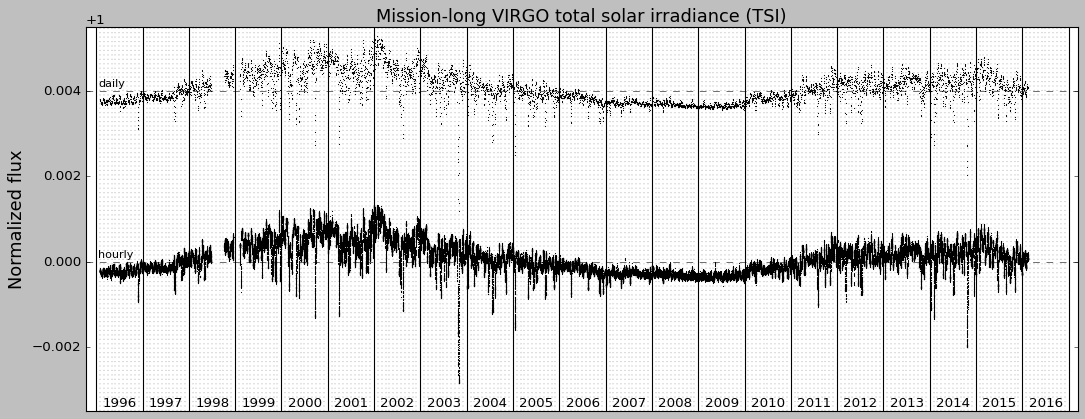

In [8]:
voffset = 0.004

fig, ax = plt.subplots(1,1,figsize=(16,6))
ax.plot(TSIdaily['jd'][goodDaily], TSIdaily['VIRGO_new'][goodDaily]/np.median(TSIdaily['VIRGO_new'][goodDaily]) + voffset,'k.',  ms=1, alpha=1,ls='None',zorder=2)
ax.plot(TSIhourly['jd'][goodHourly], TSIhourly['VIRGO_new'][goodHourly]/np.median(TSIhourly['VIRGO_new'][goodHourly]),'k.',ms=1,alpha=1,ls='None', zorder=3)

ax.set_ylim(0.9965,1.0055)
ax.set_xlim(2450000, 2457500 + 325)

for y in range(1996, 2017):
    jan1 = str(y) + '-01-01T00:00:00.000Z'
    jan1 = astropy.time.Time(jan1).jd
    ax.axvline(jan1, color='k', ls='-', lw=1, zorder=1)

    ax.text(jan1+50, 0.9966, str(y), zorder=4)
    
    for m in range(2,13):
        m1 = str(y) + '-' + str(m).zfill(2) + '-01T00:00:00.000Z'
        m1 = astropy.time.Time(m1).jd
        ax.axvline(m1, color='k', ls=':', lw=0.25, zorder=1)
    
jan1 = '2017-01-01T00:00:00.000Z'
jan1 = astropy.time.Time(jan1).jd
ax.axvline(jan1, color='k', ls='-', lw=1)
ax.axhline(1, color='k', ls = '--', lw=0.5, zorder=1)
ax.axhline(1+voffset, color = 'k', ls='--', lw=0.5, zorder=1)

ax.set_ylabel('Normalized flux',fontsize=16)
ax.set_xticks([])

ax.text(2450100, 1.0001, "hourly", fontsize=10)
ax.text(2450100, 1.0041, "daily",fontsize=10)
ax.set_title("Mission-long VIRGO total solar irradiance (TSI)", fontsize=16)
plt.savefig("virgoTSI_missionlong.pdf",bbox_inches="tight")

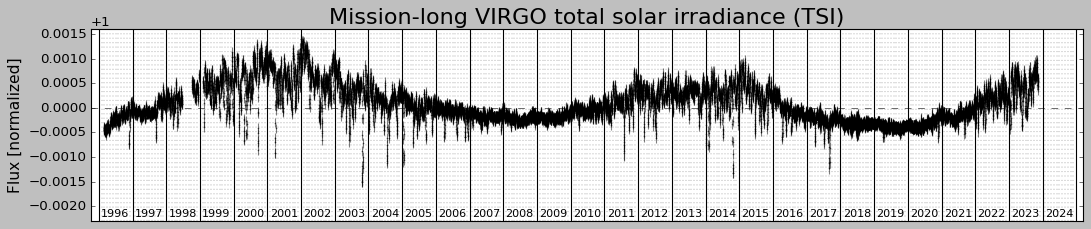

In [15]:
voffset = 0.004

fig, ax = plt.subplots(1,1,figsize=(16,3))
ax.errorbar(pmodwrc_TSIdaily['jd'][pmodwrc_goodDaily], 
            pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodDaily]/np.median(pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodDaily]),
            yerr=pmodwrc_TSIdaily['TSI_virgo_fused_unc'][pmodwrc_goodDaily]/np.median(pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodDaily]),
            color='k', marker='.',capsize=0,elinewidth=1, ms=2, alpha=0.5,ls='None',zorder=2)
#ax.errorbar(pmodwrc_TSIhourly['jd'][pmodwrc_goodHourly], 
#            pmodwrc_TSIhourly['TSI_virgo_fused_new'][pmodwrc_goodHourly]/np.median(pmodwrc_TSIhourly['TSI_virgo_fused_new'][pmodwrc_goodHourly]),
#            yerr=pmodwrc_TSIhourly['TSI_virgo_fused_unc'][pmodwrc_goodHourly]/np.median(pmodwrc_TSIhourly['TSI_virgo_fused_new'][pmodwrc_goodHourly]),
#            color='k', marker='.',capsize=0,elinewidth=1, ms=2, alpha=0.01,ls='None',zorder=3)

#ax.set_ylim(0.9977,1.0057)
ax.set_ylim(0.9977,1.0016)
ax.set_xlim(2450000, 2460750)

for y in range(1996, 2025):
    jan1 = str(y) + '-01-01T00:00:00.000Z'
    jan1 = astropy.time.Time(jan1).jd
    ax.axvline(jan1, color='k', ls='-', lw=1, zorder=1)

    ax.text(jan1+25, 0.9978, str(y), zorder=4,fontsize=10)
    
    for m in range(2,13):
        m1 = str(y) + '-' + str(m).zfill(2) + '-01T00:00:00.000Z'
        m1 = astropy.time.Time(m1).jd
        ax.axvline(m1, color='k', ls=':', lw=0.25, zorder=1)
    
jan1 = '2025-01-01T00:00:00.000Z'
jan1 = astropy.time.Time(jan1).jd
ax.axvline(jan1, color='k', ls='-', lw=1)
ax.axhline(1, color='k', ls = '--', lw=0.5, zorder=1)
#ax.axhline(1+voffset, color = 'k', ls='--', lw=0.5, zorder=1)

ax.set_ylabel('Flux [normalized]',fontsize=14)
ax.set_xticks([])

#ax.text(2450100, 1.0001, "hourly", fontsize=10)
#ax.text(2450100, 1.0001, "daily",fontsize=10)
ax.set_title("Mission-long VIRGO total solar irradiance (TSI)", fontsize=20)
plt.savefig("virgoTSI_missionlong_pmodwrc_dailyOnly.pdf",bbox_inches="tight")

In [26]:
# plots of TSI for each year individually
"""
for year in range(1996, 2017):
    jan1_thisyear ='{0}-01-01T00:00:00.000Z'.format(year)
    jan1_thisyear = astropy.time.Time(jan1_thisyear).jd

    jan1_nextyear ='{0}-01-01T00:00:00.000Z'.format(year+1)
    jan1_nextyear = astropy.time.Time(jan1_nextyear).jd

    thisyearMask = (TSIhourly['jd'][goodHourly] >= jan1_thisyear) & (TSIhourly['jd'][goodHourly] < jan1_nextyear)
    
    fig, ax = plt.subplots(1,1,figsize=(16,3))
    ax.plot(TSIhourly['jd'][goodHourly][thisyearMask], 
            TSIhourly['VIRGO_new'][goodHourly][thisyearMask]/np.median(TSIhourly['VIRGO_new'][goodHourly]),
            'k.',ms=1,alpha=1,ls='None', zorder=3)
    
    ax.set_ylim(0.9965,1.002)
    ax.set_xlim(jan1_thisyear, jan1_nextyear)
    
    for m in range(1,13):
        m1 = str(year) + '-' + str(m).zfill(2) + '-01T00:00:00.000Z'
        m1 = astropy.time.Time(m1).jd
        ax.text(m1+10, 0.997, months[m-1], fontsize=15)
        ax.axvline(m1, color='k', ls='-', lw=1, zorder=1)
          
    ax.axhline(1, color='k', ls = '--', lw=0.5, zorder=1)
    
    ax.set_ylabel('Normalized flux',fontsize=16)
    ax.set_xticks([])

    ax.set_title("Mission-long VIRGO total solar irradiance (TSI), {0}".format(year), fontsize=16)
    plt.savefig("virgoTSI_{0}.png".format(year),bbox_inches="tight")
    plt.close()
"""

'\nfor year in range(1996, 2017):\n    jan1_thisyear =\'{0}-01-01T00:00:00.000Z\'.format(year)\n    jan1_thisyear = astropy.time.Time(jan1_thisyear).jd\n\n    jan1_nextyear =\'{0}-01-01T00:00:00.000Z\'.format(year+1)\n    jan1_nextyear = astropy.time.Time(jan1_nextyear).jd\n\n    thisyearMask = (TSIhourly[\'jd\'][goodHourly] >= jan1_thisyear) & (TSIhourly[\'jd\'][goodHourly] < jan1_nextyear)\n    \n    fig, ax = plt.subplots(1,1,figsize=(16,3))\n    ax.plot(TSIhourly[\'jd\'][goodHourly][thisyearMask], \n            TSIhourly[\'VIRGO_new\'][goodHourly][thisyearMask]/np.median(TSIhourly[\'VIRGO_new\'][goodHourly]),\n            \'k.\',ms=1,alpha=1,ls=\'None\', zorder=3)\n    \n    ax.set_ylim(0.9965,1.002)\n    ax.set_xlim(jan1_thisyear, jan1_nextyear)\n    \n    for m in range(1,13):\n        m1 = str(year) + \'-\' + str(m).zfill(2) + \'-01T00:00:00.000Z\'\n        m1 = astropy.time.Time(m1).jd\n        ax.text(m1+10, 0.997, months[m-1], fontsize=15)\n        ax.axvline(m1, color=\'k\',

# See what changes between ESA archive version and PMODWRC FTP version.

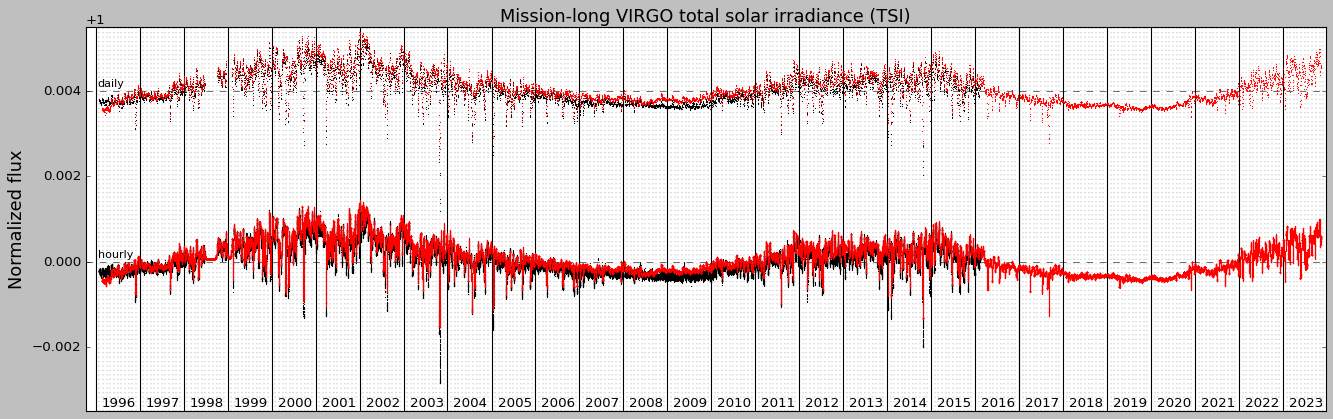

In [7]:
voffset = 0.004

fig, ax = plt.subplots(1,1,figsize=(20,6))
ax.plot(TSIdaily['jd'][goodDaily], TSIdaily['VIRGO_new'][goodDaily]/np.median(TSIdaily['VIRGO_new'][goodDaily]) + voffset,'k.',  ms=1, alpha=1,ls='None',zorder=2)
ax.plot(TSIhourly['jd'][goodHourly], TSIhourly['VIRGO_new'][goodHourly]/np.median(TSIhourly['VIRGO_new'][goodHourly]),'k.',ms=1,alpha=1,ls='None', zorder=3)

ax.plot(pmodwrc_TSIdaily['jd'][pmodwrc_goodDaily], pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodDaily]/np.median(pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodDaily]) + voffset,'r.',  ms=1, alpha=1,ls='None',zorder=2)
ax.plot(pmodwrc_TSIhourly['jd'][pmodwrc_goodHourly], pmodwrc_TSIhourly['TSI_virgo_fused_new'][pmodwrc_goodHourly]/np.median(pmodwrc_TSIhourly['TSI_virgo_fused_new'][pmodwrc_goodHourly]),'r.',ms=1,alpha=1,ls='None', zorder=3)

ax.set_ylim(0.9965,1.0055)
ax.set_xlim(2450000, 2460300)

for y in range(1996, 2024):
    jan1 = str(y) + '-01-01T00:00:00.000Z'
    jan1 = astropy.time.Time(jan1).jd
    ax.axvline(jan1, color='k', ls='-', lw=1, zorder=1)

    ax.text(jan1+50, 0.9966, str(y), zorder=4)
    
    for m in range(2,13):
        m1 = str(y) + '-' + str(m).zfill(2) + '-01T00:00:00.000Z'
        m1 = astropy.time.Time(m1).jd
        ax.axvline(m1, color='k', ls=':', lw=0.25, zorder=1)
    
jan1 = '2017-01-01T00:00:00.000Z'
jan1 = astropy.time.Time(jan1).jd
ax.axvline(jan1, color='k', ls='-', lw=1)
ax.axhline(1, color='k', ls = '--', lw=0.5, zorder=1)
ax.axhline(1+voffset, color = 'k', ls='--', lw=0.5, zorder=1)

ax.set_ylabel('Normalized flux',fontsize=16)
ax.set_xticks([])

ax.text(2450100, 1.0001, "hourly", fontsize=10)
ax.text(2450100, 1.0041, "daily",fontsize=10)
ax.set_title("Mission-long VIRGO total solar irradiance (TSI)", fontsize=16)
plt.savefig("virgoTSI_missionlong_PMODWRCcomp.pdf",bbox_inches="tight")
#plt.show()

In [8]:
overlapDaily = np.intersect1d(np.array(TSIdaily['jd'][goodDaily]), np.array(pmodwrc_TSIdaily['jd'][pmodwrc_goodDaily]))

goodOverlapDaily = np.where(np.in1d(TSIdaily['jd'], overlapDaily))[0]
pmodwrc_goodOverlapDaily = np.where(np.in1d(pmodwrc_TSIdaily['jd'], overlapDaily))[0]

print(len(TSIdaily[goodOverlapDaily]))
print(len(pmodwrc_TSIdaily[pmodwrc_goodOverlapDaily]))

7070
7070


In [78]:
#the below is very slow to run, and since not using hourly cadence, haven't actually run it

overlapHourly = np.atleast_1d(np.empty((0)))
pmodwrc_overlapHourly = np.atleast_1d(np.empty((0)))
for i0, i1 in itertools.product(np.arange(np.array(TSIhourly['jd'][goodHourly]).shape[0]),
                                np.arange(np.array(pmodwrc_TSIhourly['jd'][pmodwrc_goodHourly]).shape[0])):
    if np.all(np.isclose(TSIhourly['jd'][i0], np.array(pmodwrc_TSIhourly['jd'][pmodwrc_goodHourly])[i1], atol=2e-3)):
         overlapHourly = np.concatenate((overlapHourly, np.atleast_1d(np.array(TSIhourly['jd'][goodHourly])[i0])))
         pmodwrc_overlapHourly = np.concatenate((pmodwrc_overlapHourly, np.atleast_1d(np.array(pmodwrc_TSIhourly['jd'][pmodwrc_goodHourly])[i1])))

print(overlapHourly)
print(np.shape(overlapHourly))
      
goodOverlapHourly = np.where(np.in1d(TSIhourly['jd'], overlapHourly))[0]
pmodwrc_goodOverlapHourly = np.where(np.in1d(pmodwrc_TSIhourly['jd'], pmodwrc_overlapHourly))[0]

print(len(TSIhourly[goodOverlapHourly]))
print(len(pmodwrc_TSIhourly[pmodwrc_goodOverlapHourly]))

KeyboardInterrupt: 

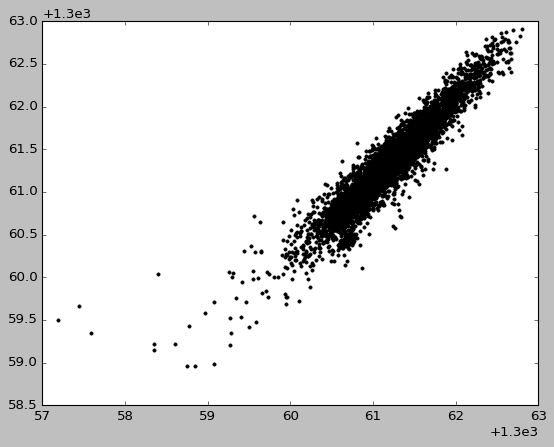

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(TSIdaily['VIRGO_new'][goodOverlapDaily], pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodOverlapDaily], 'k.')

plt.show()


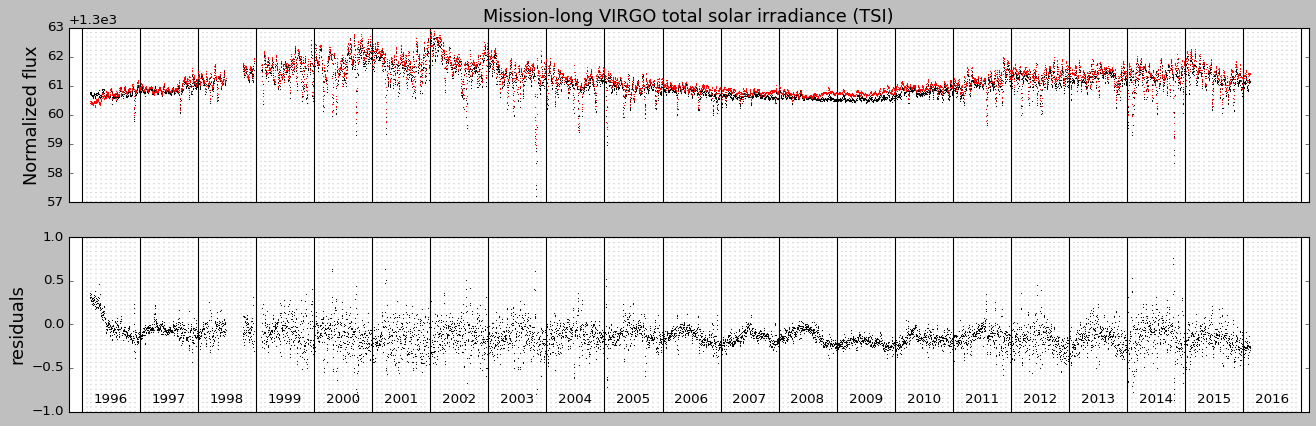

In [28]:
fig, axes = plt.subplots(2,1,figsize=(20,6))
axes[0].plot(TSIdaily['jd'][goodOverlapDaily], TSIdaily['VIRGO_new'][goodOverlapDaily],'k.',  ms=1, alpha=1,ls='None',zorder=2)
axes[0].plot(pmodwrc_TSIdaily['jd'][pmodwrc_goodOverlapDaily], pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodOverlapDaily],'r.',  ms=1, alpha=1,ls='None',zorder=2)

#residuals
axes[1].plot(TSIdaily['jd'][goodOverlapDaily], TSIdaily['VIRGO_new'][goodOverlapDaily]-pmodwrc_TSIdaily['TSI_virgo_fused_new'][pmodwrc_goodOverlapDaily],'k.',ms=1,alpha=1,ls='None', zorder=3)

#axes[0].set_ylim(0.998,1.002)
axes[1].set_ylim(-1,1)

for ax in axes:
    ax.set_xlim(2450000, 2457800)
    ax.set_xticks([])

    for y in range(1996, 2017):
        jan1 = str(y) + '-01-01T00:00:00.000Z'
        jan1 = astropy.time.Time(jan1).jd
        ax.axvline(jan1, color='k', ls='-', lw=1, zorder=1)
    
        for m in range(2,13):
            m1 = str(y) + '-' + str(m).zfill(2) + '-01T00:00:00.000Z'
            m1 = astropy.time.Time(m1).jd
            ax.axvline(m1, color='k', ls=':', lw=0.25, zorder=1)

    jan1 = '2017-01-01T00:00:00.000Z'
    jan1 = astropy.time.Time(jan1).jd
    ax.axvline(jan1, color='k', ls='-', lw=1,zorder=1)
        
for y in range(1996, 2017):
    jan1 = str(y) + '-01-01T00:00:00.000Z'
    jan1 = astropy.time.Time(jan1).jd
    axes[1].text(jan1+75, -0.9, str(y), zorder=4)
    
axes[0].set_ylabel('Normalized flux',fontsize=16)
axes[1].set_ylabel('residuals', fontsize=16)

axes[0].set_title("Mission-long VIRGO total solar irradiance (TSI)", fontsize=16)
plt.savefig("virgoTSI_missionlong_PMODWRCcomp_residuals.pdf",bbox_inches="tight")
#plt.show()

# Will not use spectral irradiance or LOI data plotted below.

2450105.5


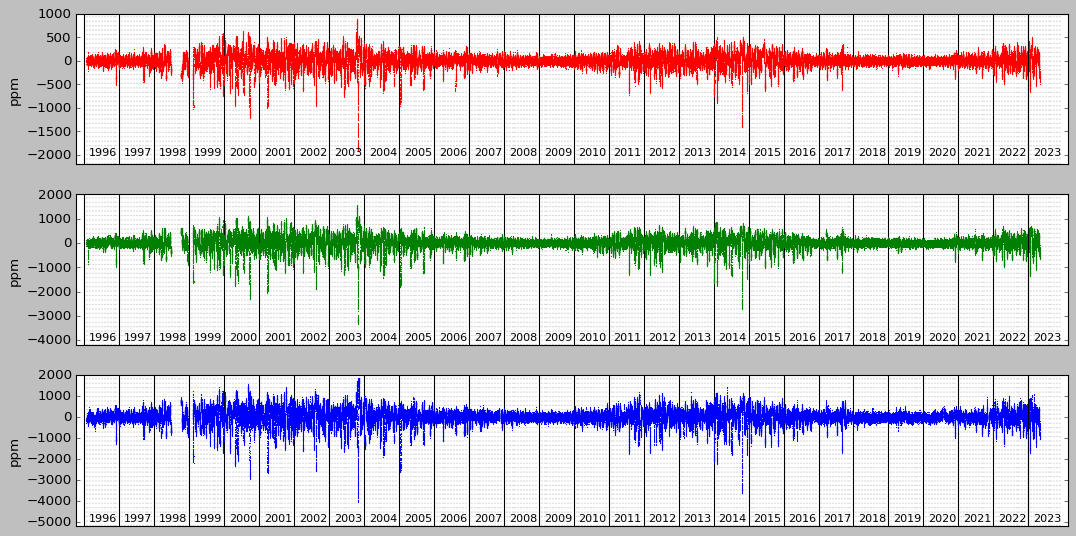

In [8]:
colors = ['r','g','b']

SPM_start = '1996-01-23T00:00:00'
SPM_start = astropy.time.Time(SPM_start).jd
print(SPM_start)

voffsets = [-2000,-4000,-5000]

fig, axes = plt.subplots(3,1,figsize=(16,8))
for i,fpath in enumerate([red, green, blue]):
    hdul = fits.open(fpath)
    header = hdul[0].header
    data = hdul[0].data
    #print(type(data))
    #print(np.shape(data))

    #print(repr(header))
    #print("")

    #data[:,0] is measured in seconds since '1996-01-23T00:00:00'
    data[:,0] = SPM_start + (data[:,0]/(24.*3600.))

    axes[i].plot(data[::60,0],data[::60,1], marker='.',ls='None',color=colors[i], ms=1,alpha=1)
    axes[i].set_ylabel("ppm")

    for y in range(1996, 2024):
        jan1 = str(y) + '-01-01T00:00:00.000Z'
        jan1 = astropy.time.Time(jan1).jd
        axes[i].axvline(jan1, color='k', ls='-', lw=1, zorder=1)
    
        axes[i].text(jan1+50, voffsets[i], str(y), fontsize=10)
        
        for m in range(2,13):
            m1 = str(y) + '-' + str(m).zfill(2) + '-01T00:00:00.000Z'
            m1 = astropy.time.Time(m1).jd
            axes[i].axvline(m1, color='k', ls=':', lw=0.25, zorder=1)
    axes[i].set_xlim(2450000., 2460365.)
    jan1 = '2023-01-01T00:00:00.000Z'
    jan1 = astropy.time.Time(jan1).jd
    axes[i].axvline(jan1, color='k', ls='-', lw=1)
    axes[i].set_xticks([])


axes[0].set_ylim(-2200,1000)
axes[1].set_ylim(-4200,2000)
axes[2].set_ylim(-5200,2000)
#plt.show()
plt.savefig("./VIRGO_RGB.png", bbox_inches="tight")

    

In [9]:
for year in range(1996,2024):
    fig, axes = plt.subplots(3,1,figsize=(16,6))
    for i,fpath in enumerate([red, green, blue]):
        hdul = fits.open(fpath)
        header = hdul[0].header
        data = hdul[0].data
        #print(type(data))
        #print(np.shape(data))
    
        #print(repr(header))
        #print("")
    
        #data[:,0] is measured in seconds since '1996-01-23T00:00:00'
        data[:,0] = SPM_start + (data[:,0]/(24.*3600.))

        jan1_thisyear ='{0}-01-01T00:00:00.000Z'.format(year)
        jan1_thisyear = astropy.time.Time(jan1_thisyear).jd

        jan1_nextyear ='{0}-01-01T00:00:00.000Z'.format(year+1)
        jan1_nextyear = astropy.time.Time(jan1_nextyear).jd

        thisyearMask = (data[:,0] >= jan1_thisyear) & (data[:,0] < jan1_nextyear)
    
        axes[i].plot(data[:,0][thisyearMask][::60],data[:,1][thisyearMask][::60], marker='.',ls='None',color=colors[i], ms=1,alpha=1)
        axes[i].set_ylabel("ppm")
    
        for m in range(1,13):
            m1 = str(year) + '-' + str(m).zfill(2) + '-01T00:00:00.000Z'
            m1 = astropy.time.Time(m1).jd
            axes[i].text(m1+10, voffsets[i], months[m-1], fontsize=10)
            axes[i].axvline(m1, color='k', ls='-', lw=1, zorder=1)
        
        axes[i].set_xlim(jan1_thisyear, jan1_nextyear)
        axes[i].set_xticks([])
    
    
    axes[0].set_ylim(-2200,1000)
    axes[1].set_ylim(-4200,2000)
    axes[2].set_ylim(-5200,2000)

    axes[0].set_title("SOHO VIRGO SPM, {0}".format(year),fontsize=16)
    #plt.subplots_adjust(hspace=0.1)
    #plt.show()
    plt.savefig("./VIRGO_RGB_{0}.png".format(year), bbox_inches="tight")
    plt.close()

    

(16, 13191840)
SIMPLE  =                    T / Written by IDL:  Wed Feb 15 19:59:54 2023      
BITPIX  =                  -64 /Real*8 (double precision)                       
NAXIS   =                    2 /                                                
NAXIS1  =             13191840 /                                                
NAXIS2  =                   16 /                                                
DATE    = '2021-11-10T09:23:27.00005292892467Z' /                               
ORIGIN  = 'IAS/TA  '           /                                                
TELESCOP= 'SOHO    '           /                                                
INSTRUME= 'VIRGO   '           /                                                
DETECTOR= 'LOI     '           /                                                
BUNIT   = 'ppm     '           /parts-per-million                               
CHANNEL = 'GREEN : Wavelength=500nm, Width=5nm' /                               
DATE-OBS= '19

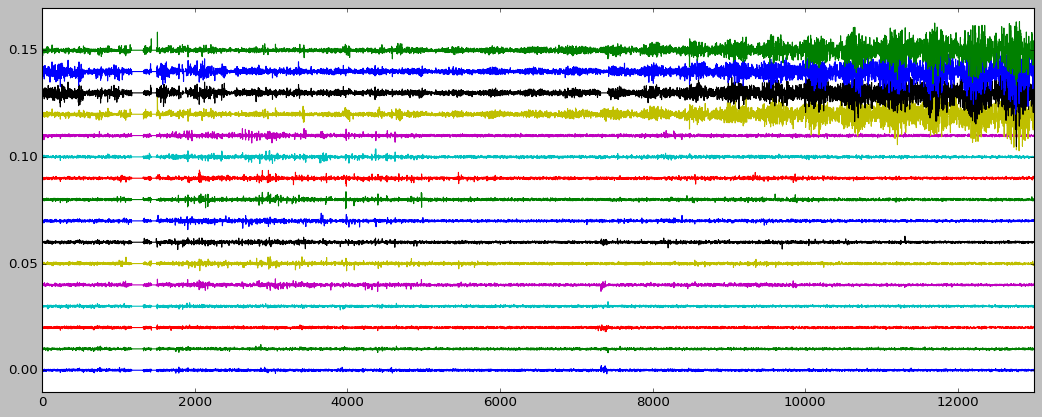

In [17]:
hdul = fits.open(loi)
header = hdul[0].header
data = hdul[0].data
print(np.shape(data))
print(repr(header))
fig, ax = plt.subplots(1,1,figsize=(16,6))
for i in range(np.shape(data)[0]):
    ax.plot(data[i,::1000]+0.01*i, alpha=1)
ax.set_ylim(-0.01,0.17)
ax.set_xlim(0,13000)
#plt.show()
plt.savefig("./VIRGO_LOI.png",bbox_inches="tight")